In [140]:
import sympy as sy
import numpy as np

In [174]:
A = sy.Matrix([[5,-2],[-2,5]])
print('A = ',A)

A =  Matrix([[5, -2], [-2, 5]])


Create a string vector giving the names in the vector x.

In [171]:
x = sy.Matrix([['x1'],['x2']])
print('x = ',x)

x =  Matrix([[x1], [x2]])


Print out the quadratic form so we can copy and paste to print later on.

In [215]:
from sympy import simplify
Quadx = simplify(x.T*A*x)[0]
print('The quadratic form q(x1,x2) = ',Quadx)

The quadratic form q(x1,x2) =  5*x1**2 - 4*x1*x2 + 5*x2**2


Diagonalize the matrix A.  Notice that we can ask for SymPy to give as unit length eigenvectors in Q.

In [227]:
Q,D = A.diagonalize(normalize = True)
print('Eigenvalues of A are: ',D, '\n and normalized eigenvectors of A are: \n',Q)
lambda1 = D[0]
u1 = Q[:,0]
print('First eigenvalue lambda1 = ',lambda1,'\n and its associated eigenvector u1 = \n',u1)
lambda2 = D[1]
u2 = Q[:,1]
print('Second eigenvalue lambda2 = ',lambda2,'\n and its associated eigenvector u2 = \n',u2)

print('')

Eigenvalues of A are:  Matrix([[3, 0], [0, 7]]) 
 and normalized eigenvectors of A are: 
 Matrix([[sqrt(2)/2, -sqrt(2)/2], [sqrt(2)/2, sqrt(2)/2]])
First eigenvalue lambda1 =  3 
 and its associated eigenvector u1 = 
 Matrix([[sqrt(2)/2], [sqrt(2)/2]])
Second eigenvalue lambda2 =  0 
 and its associated eigenvector u2 = 
 Matrix([[-sqrt(2)/2], [sqrt(2)/2]])



And now we want to plot the level curve $q(x1,x2) = 1$.  Items you may need to adjust are:

    - the size of the x1 and x2 grid
    - the values a,b,c,d that point to the endpoint of the eigenvectors at (a,b) and (c,d)
    - the equation to plot in plt.contour(...)
    - the xy and xytext values to tell where arrows point to (xy) and where to write the text to label the arrows (xytext)
    

(1000,)


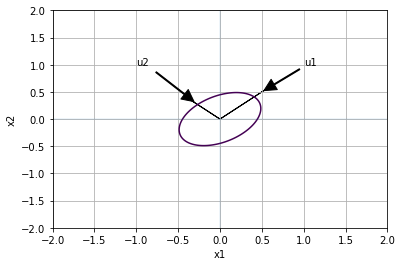

In [219]:
%matplotlib inline
import matplotlib.pyplot as plt

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
    
x1 = np.linspace(-5,5,1000)
x2 = np.linspace(-5,5,1000)

x1,x2 = np.meshgrid(x1,x2)

a = 1/np.sqrt(3)
b = 1/np.sqrt(3)
c = -1/np.sqrt(7)
d = 1/np.sqrt(7)

fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.contour(x1,x2,5*x1**2 - 4*x1*x2 + 5*x2**2,[1])
plt.arrow(0,0,a,b)
plt.arrow(0,0,c,d)
ax.annotate('u1', xy=(0.5, 0.5), xytext=(1, 1),
            arrowprops=dict(facecolor='black', width = 1,shrink=0.05),
            )
ax.annotate('u2', xy=(-0.25, 0.25), xytext=(-1, 1),
            arrowprops=dict(facecolor='black', width = 1,shrink=0.1),
            )

plt.xlim([-2,2])
plt.ylim([-2,2])
axes()
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.axis('scaled')


Now, we'll rotate the ellipse so that eigenvectors are aligned with axes.  

We create new vectors $\mathbf{y} = Q^T\mathbf{x}$.

This gives the new quadratic form ${\tilde q}\ (y_1,y_2) = \mathbf{y}^T D\mathbf{y}$.

In [228]:
y = sy.Matrix([['y1'],['y2']])

Quady = simplify(y.T*D*y)[0]
print('The quadratic form q(y1,y2) = ',Quady)

The quadratic form q(y1,y2) =  3*y1**2 + 7*y2**2


This transforms the eigenvectors (either via rotation or reflection) to the axes.  

Question:  What linear transformation is $Q^T$? (Look at its determinant.)

In [229]:
y1 = np.transpose(Q)@u1
print(y1)
y2 = np.transpose(Q)@u2
print(y2)
Q.det()

Matrix([[1], [0]])
Matrix([[0], [1]])


1

We can plot the level curve ${\tilde q}\ (y_1,y_2) = \mathbf{y}^T D\mathbf{y} = 1$ and see that the eigenvectors have moved to the axes.  


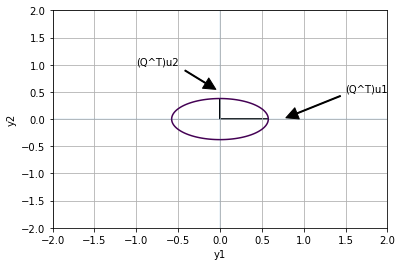

In [230]:
fig = plt.figure(2)
ax = fig.add_subplot(111)

y1 = np.linspace(-5,5,1000)
y2 = np.linspace(-5,5,1000)
y1,y2 = np.meshgrid(y1,y2)

plt.contour(y1,y2,3*(y1**2)+7*(y2**2),[1])
plt.arrow(0,0,1/np.sqrt(3),0)
plt.arrow(0,0,0,1/np.sqrt(7))
ax.annotate('(Q^T)u1', xy=(0.75, 0), xytext=(1.5, 0.5),
            arrowprops=dict(facecolor='black', width = 1,shrink=0.05),
            )
ax.annotate('(Q^T)u2', xy=(0, 0.5), xytext=(-1, 1),
            arrowprops=dict(facecolor='black', width = 1,shrink=0.1),
            )

plt.xlim([-2,2])
plt.ylim([-2,2])
axes()
plt.xlabel('y1')
plt.ylabel('y2')
plt.grid()